In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='539bee1b-ef35-4614-92cb-edda37b96f50', project_access_token='p-666b2c924511e57e3ea2af0c8356b1ce4f909bc6')
pc = project.project_context


In [2]:
# Insert project token here

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - BanCoppel

<hr>

## Instalando Librerias

In [3]:
!pip install --upgrade scikit-learn==0.20.3

Requirement already up-to-date: scikit-learn==0.20.3 in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.20.3)


In [4]:
!pip install xgboost --upgrade

     |████████████████████████████████| 148.9MB 37.1MB/s eta 0:00:01


In [5]:
!pip install imblearn --upgrade

     |████████████████████████████████| 174kB 669kB/s eta 0:00:01
     |████████████████████████████████| 6.8MB 5.8MB/s eta 0:00:01��███████████████████     | 5.8MB 5.8MB/s eta 0:00:01
     |████████████████████████████████| 307kB 32.7MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


<hr>

## Descargar los conjuntos de datos en formato .csv

In [6]:
import pandas as pd
import numpy as np

In [7]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-08 15:39:06--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘training_dataset.csv’

    [ <=>                                   ] 2,327,419   --.-K/s   in 0.02s   

2020-09-08 15:39:06 (115 MB/s) - ‘training_dataset.csv’ saved [2327419]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,F,40.0,Soltero,Profesor,Sector privado,Iphone 6+,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
23995,155,F,24.0,NaN,Profesor,Institucion publica,L G,15.0,6.0,Si,30.0,30.0,31.0,30.0,7.0,Perfil_0
23996,229,F,24.0,Casado,Profesor,Desempleados,LG V10,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
23997,214,F,24.0,Soltero,Desempleados,Desempleados,Android,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
23998,30,M,30.0,Casado,Servidor publico,Institucion publica,0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


Sobre el archivo "training_dataset.csv", temos alguna información sobre los usuarios de la app de BanCoppel:

**ID**

**Genero**

**Idade**

**Estado_civil**

**Trabajo**

**Sector**

**Telefono**

**Anos_usando_internet_banking**

**Anos_usando_banca_movil**

**Banca_movil_userfriendly**

**Frecuencia_internet_banking_mes**

**Frecuencia_banca_movil_mes**

**Frecuencia_pagamentos_tarjeta_mes**

**Frecuencia_tarjeta_virtual_mes**

**Frecuencia_saldo_cuenta_mes**

**TARGET**

In [8]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 16 columns):
ID                                   23999 non-null int64
Genero                               23110 non-null object
Años                                 23731 non-null float64
Estado_civil                         23295 non-null object
Trabajo                              21044 non-null object
Sector                               23640 non-null object
Telefono                             22578 non-null object
Anos_usando_internet_banking         23355 non-null float64
Anos_usando_banca_movil              22698 non-null float64
Banca_movil_userfriendly             23999 non-null object
Frecuencia_internet_banking_mes      21275 non-null float64
Frecuencia_banca_movil_mes           22728 non-null float64
Frecuencia_pagamentos_tarjeta_mes    23714 non-null float64
Frecuencia_tarjeta_virtual_mes       23524 non-null float64
Frecuencia_saldo_cuenta_mes          23429 non-null float64

In [9]:
df_training_dataset.nunique()

ID                                   250
Genero                                 3
Años                                   6
Estado_civil                           2
Trabajo                               31
Sector                                 4
Telefono                              73
Anos_usando_internet_banking           5
Anos_usando_banca_movil                6
Banca_movil_userfriendly               2
Frecuencia_internet_banking_mes        7
Frecuencia_banca_movil_mes             7
Frecuencia_pagamentos_tarjeta_mes      7
Frecuencia_tarjeta_virtual_mes         7
Frecuencia_saldo_cuenta_mes            8
TARGET                                 6
dtype: int64

In [10]:
df_training_dataset.describe()

,ID,Años,Anos_usando_internet_banking,Anos_usando_banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes
count,23999.000000,23731.000000,23355.000000,22698.000000,21275.000000,22728.000000,23714.000000,23524.000000,23429.000000
mean,124.898996,34.495681,6.078484,3.624901,17.291704,17.402719,6.631399,3.157116,10.532204
std,72.305331,7.922939,3.470493,1.939364,17.207016,18.025357,10.835846,6.903053,12.299772
min,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,30.000000,5.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,125.000000,30.000000,5.000000,3.000000,7.000000,7.000000,1.000000,0.000000,4.000000
75%,188.000000,40.000000,10.000000,6.000000,31.000000,31.000000,15.000000,1.000000,15.000000
max,250.000000,50.000000,15.000000,7.000000,50.000000,50.000000,31.000000,31.000000,35.000000


In [11]:
for column in df_training_dataset.columns:
  print("Conteo para {}".format(column))
  print(df_training_dataset[column].value_counts())

df_training_dataset['TARGET'].value_counts().plot.barh()

Conteo para ID
172    125
32     119
24     119
138    115
28     115
92     115
19     113
160    113
203    113
45     113
144    113
108    112
2      112
75     112
137    111
217    111
247    111
139    110
46     110
125    110
161    110
136    109
31     109
177    109
192    109
42     109
40     108
170    108
44     108
209    108
      ... 
16      84
101     84
34      84
9       84
185     83
151     83
196     83
147     83
126     83
93      83
129     83
134     82
173     82
54      81
27      81
179     80
128     80
214     80
77      80
176     79
29      79
153     79
213     78
64      78
180     78
133     77
186     77
145     75
105     72
211     72
Name: ID, Length: 250, dtype: int64
Conteo para Genero
M    12988
F    10030
0       92
Name: Genero, dtype: int64
Conteo para Años
30.0    8546
35.0    4145
24.0    3728
40.0    2669
50.0    2399
45.0    2244
Name: Años, dtype: int64
Conteo para Estado_civil
Casado     11887
Soltero    11408
Name: Estado_civil, 

<hr>

## Desglose del desafío: clasificación multiclase

Este es un desafio cuyo objetivo de negocio es la segmentación de usuario de aplicativos de BanCopp. Podemos utilizar  dos enfoques: Machine Learning supervisado (clasificación) o no supervisado (clustering). En este desafío será usado la clasificación porque el conjunto de datos ya está disponible con "labels", o en otras palabras, ya con la variable objetivo. 

En la biblioteca scikit-learn tenemos diversos algoritmos para clasificación. El participante es libre para utilizar el framework que desee para completar este desafío.

En este notebook será mostrado un ejemplo usando el algoritmo "Decision Tree" para clasificar los estudantes en seis diferentes perfiles.

# ¡Atención!

La columna objetivo de este desafío es la columna ``TARGET``

<hr>

## Pre-procesando el dataset antes del entrenamiento

### Procesando valores NaN y algunos 0

En las features que uso como categoria, el valor nulo o cero(donde corresponda) lo trato como Not_especificado

In [12]:
# Mostrando los datos nulos del dataset antes de la segunda transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación SimpleImputer: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64



In [13]:
# En las categoricas, para los valores Nan o 0 seteo not_especificado
columns_not_especificado = ['Telefono', 'Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Años']
columns_not_especificado = [column for column in df_training_dataset.columns if 'TARGET' not in column]
df_training_dataset_2 = df_training_dataset.copy()
for column in columns_not_especificado:
  df_training_dataset_2[column] = df_training_dataset[column].fillna(value='not_especificado')

df_training_dataset_2.loc[df_training_dataset_2.Genero == '0', 'Genero'] = 'not_especificado'
df_training_dataset_2.loc[df_training_dataset_2.Telefono == '0', 'Telefono'] = 'not_especificado'

# # En las numericas uso SimpleImputer
# from sklearn.impute import SimpleImputer
# import numpy as np

# impute_zeros = SimpleImputer(
#     missing_values=np.nan,
#     strategy='constant',
#     fill_value=0,
#     verbose=0,
#     copy=True
# )
# # Aplicando la transformación ``SimpleImputer`` en conjunto de datos base
# si_columns = ['Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes']

# df_training_dataset_2[si_columns] = impute_zeros.fit_transform(X=df_training_dataset_2[si_columns])


In [14]:

# Mostrando los datos nulos del dataset despues de la segunda transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset_2.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset despues de la transformación SimpleImputer: 

ID                                   0
Genero                               0
Años                                 0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Banca_movil_userfriendly             0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
TARGET                               0
dtype: int64



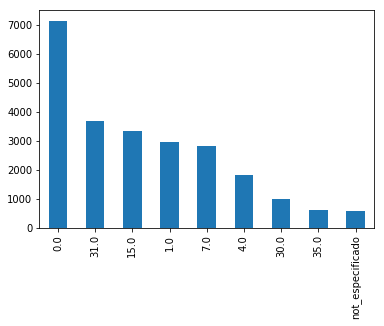

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

df_training_dataset_2['Frecuencia_saldo_cuenta_mes'].value_counts(dropna=False).plot.bar()

In [17]:
for column in df_training_dataset_2.columns:
  print("Conteo para {}".format(column))
  print(df_training_dataset_2[column].value_counts())

Conteo para ID
172    125
32     119
24     119
138    115
28     115
92     115
19     113
160    113
203    113
45     113
144    113
108    112
2      112
75     112
137    111
217    111
247    111
139    110
46     110
125    110
161    110
136    109
31     109
177    109
192    109
42     109
40     108
170    108
44     108
209    108
      ... 
16      84
101     84
34      84
9       84
185     83
151     83
196     83
147     83
126     83
93      83
129     83
134     82
173     82
54      81
27      81
179     80
128     80
214     80
77      80
176     79
29      79
153     79
213     78
64      78
180     78
133     77
186     77
145     75
105     72
211     72
Name: ID, Length: 250, dtype: int64
Conteo para Genero
M                   12988
F                   10030
not_especificado      981
Name: Genero, dtype: int64
Conteo para Años
30.0                8546
35.0                4145
24.0                3728
40.0                2669
50.0                2399
45.0        

### Telefono transformo a marca/brand

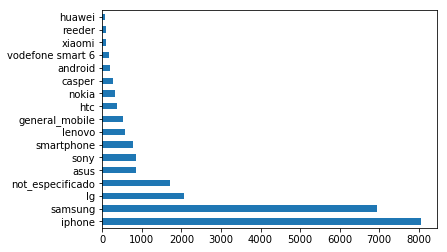

In [19]:
brands = {
    "iphone": ["iphone"],
    "samsung": ["samsung", "galaxy"],
    "sony": ["sony", "xperia"],
    "xiaomi": ["xiaomi"],
    "htc": ["htc"],
    "lenovo": ["lenovo"],
    "huawei": ["huawei"],
    "nokia": ["nokia"],
    "asus": ["asus"],
    "general_mobile": ["general mobile", "genaral mobile"],
    "lg": ["lg", "l g"],
}

df_training_dataset_2.Telefono = df_training_dataset_2.Telefono.str.lower()
for brand, posible_names in brands.items():
  for posible_name in posible_names:
    df_training_dataset_2.loc[df_training_dataset_2.Telefono.str.contains(posible_name), 'Telefono'] = brand

df_training_dataset_2.Telefono.value_counts().plot.barh()

### Eliminando colunas no desadas

Vamos  **demonstrar** abajo como usar el método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [20]:
df_training_dataset_2.tail()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,F,40,Soltero,Profesor,Sector privado,iphone,10,3,Si,31,0,0,0,31,Perfil_3
23995,155,F,24,not_especificado,Profesor,Institucion publica,lg,15,6,Si,30,30,31,30,7,Perfil_0
23996,229,F,24,Casado,Profesor,Desempleados,lg,5,3,Si,0,30,1,0,0,Perfil_4
23997,214,F,24,Soltero,Desempleados,Desempleados,android,5,6,No,7,0,1,1,0,Perfil_4
23998,30,M,30,Casado,Servidor publico,Institucion publica,not_especificado,5,4,No,31,31,0,0,0,Perfil_3


In [21]:
df_training_dataset_3 = df_training_dataset_2.drop(columns=['ID', 'Banca_movil_userfriendly', 'Telefono', 'Sector', 'Trabajo', 'Estado_civil', 'Años', 'Genero'], inplace=False)

In [22]:
df_training_dataset_3.tail()

,Anos_usando_internet_banking,Anos_usando_banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,10,3,31,0,0,0,31,Perfil_3
23995,15,6,30,30,31,30,7,Perfil_0
23996,5,3,0,30,1,0,0,Perfil_4
23997,5,6,7,0,1,1,0,Perfil_4
23998,5,4,31,31,0,0,0,Perfil_3


### Standarizo valores

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_training_dataset_3[si_columns] = scaler.fit_transform(df_training_dataset_3[si_columns])

# ¡Atención!

Las columnas removidas anteriores son solo por ejemplo, puede usar las columnas que desee e incluso crear nuevas columnas con datos que crea que son importantes.

### Tratamiento de variables categóricas

Como mencionado antes, los computadores no son buenos con variables "categóricas" (strings).

Dado una columna con variable categórica, lo que podemos realizar es la codificación de esa columna en multiples columnas contiendo variables binárias. Este proceso es llamado "one-hot-encoding" o "dummy encoding". Si usted no esta familiarizado con estos terminos, usted puede buscar mas sobre estos en internet :)

In [23]:
# Tratando variables categóricas con el método Pandas ``get_dummies()''
categorical_columns = ['Banca_movil_userfriendly', 'Genero', 'Estado_civil', 'Sector', 'Años', 'Trabajo', 'Telefono']
categorical_columns = [column for column in df_training_dataset_3.columns if 'TARGET' not in column]
df_training = pd.get_dummies(df_training_dataset_3, columns=categorical_columns)
df_training.tail()

,TARGET,Anos_usando_internet_banking_0.0,Anos_usando_internet_banking_5.0,Anos_usando_internet_banking_6.0,Anos_usando_internet_banking_10.0,Anos_usando_internet_banking_15.0,Anos_usando_internet_banking_not_especificado,Anos_usando_banca_movil_0.0,Anos_usando_banca_movil_3.0,Anos_usando_banca_movil_4.0,...,Frecuencia_tarjeta_virtual_mes_not_especificado,Frecuencia_saldo_cuenta_mes_0.0,Frecuencia_saldo_cuenta_mes_1.0,Frecuencia_saldo_cuenta_mes_4.0,Frecuencia_saldo_cuenta_mes_7.0,Frecuencia_saldo_cuenta_mes_15.0,Frecuencia_saldo_cuenta_mes_30.0,Frecuencia_saldo_cuenta_mes_31.0,Frecuencia_saldo_cuenta_mes_35.0,Frecuencia_saldo_cuenta_mes_not_especificado
23994,Perfil_3,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
23995,Perfil_0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23996,Perfil_4,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
23997,Perfil_4,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
23998,Perfil_3,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


# ¡Atención!

La columna **TARGET** debe ser mantenida como una string. Usted no necesita procesar/codificar la variable objetivo.

<hr>

## Entrenando un clasificador con base en un árbol de decisión

### Selecionando FEATURES y definiendo la variable TARGET

In [24]:
df_training.columns

Index(['TARGET', 'Anos_usando_internet_banking_0.0',
       'Anos_usando_internet_banking_5.0', 'Anos_usando_internet_banking_6.0',
       'Anos_usando_internet_banking_10.0',
       'Anos_usando_internet_banking_15.0',
       'Anos_usando_internet_banking_not_especificado',
       'Anos_usando_banca_movil_0.0', 'Anos_usando_banca_movil_3.0',
       'Anos_usando_banca_movil_4.0', 'Anos_usando_banca_movil_5.0',
       'Anos_usando_banca_movil_6.0', 'Anos_usando_banca_movil_7.0',
       'Anos_usando_banca_movil_not_especificado',
       'Frecuencia_internet_banking_mes_0.0',
       'Frecuencia_internet_banking_mes_1.0',
       'Frecuencia_internet_banking_mes_4.0',
       'Frecuencia_internet_banking_mes_7.0',
       'Frecuencia_internet_banking_mes_30.0',
       'Frecuencia_internet_banking_mes_31.0',
       'Frecuencia_internet_banking_mes_50.0',
       'Frecuencia_internet_banking_mes_not_especificado',
       'Frecuencia_banca_movil_mes_0.0', 'Frecuencia_banca_movil_mes_1.0',
       

In [25]:
features = df_training[[column for column in df_training.columns if 'TARGET' not in column]]
target = df_training['TARGET']  ## No cambie esta variable

### Dividiendo el conjunto de datos en conjuntos de entrenamiento y pruebas

In [32]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.001)

### SMOTE the data

In [ ]:
# Distribucion de TARGET
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smote = SMOTETomek()

X_sm, y_sm = smote.fit_sample(X_train, y_train)

In [ ]:
# Distribucion de TARGET
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

### Entrenando un árbol de decisión

In [41]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

dtc = MLPClassifier(max_iter=1000)
dtc.fit(X_train, y_train)


MLPClassifier(max_iter=1000)

### Haciendo predicciones en la muestra de prueba

In [42]:
y_pred = dtc.predict(X_test)

### Analizando imporantancia de las features

In [ ]:
# Plot de importancia de las features
import pandas as pd
from matplotlib import pyplot

(pd.Series(dtc.feature_importances_, index=X_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

In [ ]:
# Denograma de correlacion de features
from scipy.cluster import hierarchy as hc
import scipy
import matplotlib.pyplot as plt

corr = np.round(scipy.stats.spearmanr(df_training).correlation, 4) # correlation matrix
corr_condensed = hc.distance.squareform(1 - corr)         # distances matrix
z = hc.linkage(corr_condensed, method='average')          # hierarchical/agglomerative clustering

fig = plt.figure(figsize=(32,20))
dendrogram = hc.dendrogram(z, labels=df_training.columns, orientation='left', leaf_font_size=16)
plt.show()

In [ ]:
# Testing removing features
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

def get_oob(x, y, x_test):
    x = pd.get_dummies(x, columns=x.columns)
    x_test = pd.get_dummies(x_test, columns=x_test.columns)
    m = MLPClassifier()
    m.fit(x, y)
    y_p = m.predict(x_test)
    return classification_report(y_test, y_p,digits=5, target_names=['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])


for c in (X_train.columns):
    print(c, get_oob(X_train.drop(c, axis=1), y_train, X_test.drop(c, axis=1)))

### Analizando metricas del Modelo

### Analizando la calidad del modelo a través de la matriz de confusión

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

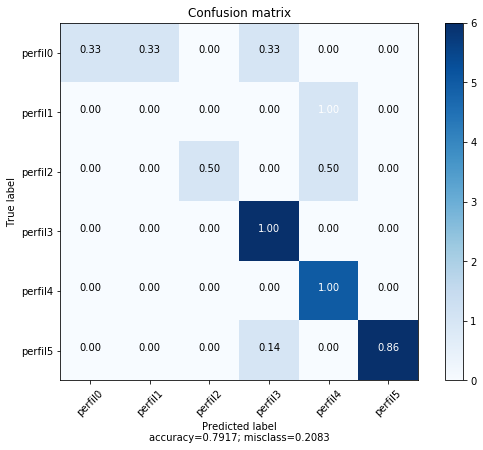

In [44]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

In [45]:
from sklearn.metrics import classification_report

def print_score(model):
    print('R^2 for training:    ', model.score(X_train, y_train))
    print('R^2 for validation:  ', model.score(X_test, y_test))
    if hasattr(model, 'oob_score_'): 
        print('OoB score:           ', model.oob_score_)
    
    print(classification_report(y_test, y_pred,digits=5, target_names=['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5']))

print_score(dtc)

R^2 for training:     0.9177893639207508
R^2 for validation:   0.7916666666666666
              precision    recall  f1-score   support

     perfil0    1.00000   0.33333   0.50000         3
     perfil1    0.00000   0.00000   0.00000         1
     perfil2    1.00000   0.50000   0.66667         2
     perfil3    0.75000   1.00000   0.85714         6
     perfil4    0.71429   1.00000   0.83333         5
     perfil5    1.00000   0.85714   0.92308         7

    accuracy                        0.79167        24
   macro avg    0.74405   0.61508   0.63004        24
weighted avg    0.83631   0.79167   0.77518        24



In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
	
# baseline model and test harness for the glass identification dataset
from numpy import mean
from numpy import std

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(dtc, features, target, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.812 (0.009)


<hr>

## Scoring de los datos necesarios para entregar la solución

Como entrega de su solución, esperamos los resultados clasificados del seguiente dataset llamado "to_be_scored.csv":

### Download la "Hoja de evaluación"

In [46]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-08 15:49:38--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv’

    [ <=>                                   ] 87,631      --.-K/s   in 0.002s  

2020-09-08 15:49:38 (46.5 MB/s) - ‘to_be_scored.csv’ saved [87631]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes
995,25,M,35.0,Casado,Desempleados,Sector privado,ASUS,5.0,3.0,No,7.0,50.0,1.0,0.0,31.0
996,179,M,40.0,Soltero,Profesor,Sector privado,Iphone,10.0,NaN,Si,0.0,1.0,0.0,15.0,1.0
997,222,M,30.0,Casado,Profesor,Institucion publica,LG G2,5.0,3.0,Si,31.0,31.0,0.0,0.0,NaN
998,238,F,35.0,Casado,Servidor publico,Desempleados,Iphone 5,15.0,4.0,No,0.0,4.0,1.0,0.0,31.0
999,152,M,35.0,Soltero,Profesor,Institucion publica,Iphone,0.0,NaN,Si,30.0,7.0,15.0,15.0,15.0


# ¡Atención!

El dataframe ``to_be_scored`` en su "hoja de evaluación". Note que la columna "categoria" no existe en esta muetra, por lo que no puede ser utilizada para entrenar modelos supervisados

In [47]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
ID                                   1000 non-null int64
Genero                               963 non-null object
Años                                 980 non-null float64
Estado_civil                         976 non-null object
Trabajo                              864 non-null object
Sector                               983 non-null object
Telefono                             927 non-null object
Anos_usando_internet_banking         977 non-null float64
Anos_usando_banca_movil              945 non-null float64
Banca_movil_userfriendly             1000 non-null object
Frecuencia_internet_banking_mes      911 non-null float64
Frecuencia_banca_movil_mes           940 non-null float64
Frecuencia_pagamentos_tarjeta_mes    991 non-null float64
Frecuencia_tarjeta_virtual_mes       977 non-null float64
Frecuencia_saldo_cuenta_mes          973 non-null float64
dtypes: float64(8), int64(1), 

<hr>

# ¡Atención!

# Para poder aplicar su modelo y clasificar la hoja de evaluación, usted debe aplicar primero todas las transformaciones de columna que usted aplico en el dataset de entrenamiento.

# No remueva o adicione filas en la hoja de evaluación. 

# No altere el orden de las filas en la hoja de evaluación. 

# Al final, las 1000 entradas deben estar clasificadas, con los valores calculados en una columna llamada "target"

<hr>

En la celda de abajo, repetimos rapidamente los mismos pasos de pré-procesamiento usados en el ejemplo dado con árbol de decisión

In [48]:
# En las categoricas, para los valores Nan o 0 seteo not_especificado
columns_not_especificado = [column for column in df_training_dataset.columns if 'TARGET' not in column]
df_to_be_scored_2 = df_to_be_scored.copy()
for column in columns_not_especificado:
  df_to_be_scored_2[column] = df_to_be_scored_2[column].fillna(value='not_especificado')

df_to_be_scored_2.loc[df_to_be_scored_2.Genero == '0', 'Genero'] = 'not_especificado'
df_to_be_scored_2.loc[df_to_be_scored_2.Telefono == '0', 'Telefono'] = 'not_especificado'

# # En las numericas uso SimpleImputer
# from sklearn.impute import SimpleImputer
# import numpy as np

# impute_zeros = SimpleImputer(
#     missing_values=np.nan,
#     strategy='constant',
#     fill_value=0,
#     verbose=0,
#     copy=True
# )
# # Aplicando la transformación ``SimpleImputer`` en conjunto de datos base
# si_columns = ['Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes']

# df_training_dataset_2[si_columns] = impute_zeros.fit_transform(X=df_training_dataset_2[si_columns])

# Remuevo columnas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['ID', 'Banca_movil_userfriendly', 'Telefono', 'Sector', 'Trabajo', 'Estado_civil', 'Años', 'Genero'], inplace=False)

# Mostrando los datos nulos verifico si quedaron nulos
print("Valores nulos del df_to_be_scored despues de la transformación: \n\n{}\n".format(df_to_be_scored_3.isnull().sum(axis = 0)))

Valores nulos del df_to_be_scored despues de la transformación: 

Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
dtype: int64



<hr>

Puede verificar abajo que las columnas de la hoja de evaluación son identicas a las usadas para entrenar el modelo:

In [49]:
print(df_training_dataset_3.columns)
for column in df_training_dataset_3.columns:
  print(df_training_dataset_3[column].value_counts())

Index(['Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'TARGET'],
      dtype='object')
5.0                 13020
10.0                 6471
0.0                  2935
15.0                  731
not_especificado      644
6.0                   198
Name: Anos_usando_internet_banking, dtype: int64
3.0                 10967
6.0                  3995
0.0                  2822
4.0                  2733
7.0                  1785
not_especificado     1301
5.0                   396
Name: Anos_usando_banca_movil, dtype: int64
31.0                5700
1.0                 3768
7.0                 3365
0.0                 3229
not_especificado    2724
50.0                2248
30.0                1523
4.0                 1442
Name: Frecuencia_internet_banking_mes, dtype: int64
7.0                 5215
31.0 

In [50]:
print(df_to_be_scored_3.columns)

print(df_to_be_scored_3.columns)
for column in df_to_be_scored_3.columns:
  print(df_to_be_scored_3[column].value_counts())

Index(['Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes'],
      dtype='object')
Index(['Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes'],
      dtype='object')
5.0                 563
10.0                257
0.0                 110
15.0                 40
not_especificado     23
6.0                   7
Name: Anos_usando_internet_banking, dtype: int64
3.0                 464
6.0                 168
0.0                 119
4.0                  93
7.0                  81
not_especificado     55
5.0                  20
Name: Anos_usando_banca_movil, dtype: int64
31.0                224
1.0              

In [51]:
# Tratando variables categóricas con el método Pandas ``get_dummies()''
categorical_columns = [column for column in df_training_dataset_3.columns if 'TARGET' not in column]
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=categorical_columns)
df_to_be_scored_4.tail()

,Anos_usando_internet_banking_0.0,Anos_usando_internet_banking_5.0,Anos_usando_internet_banking_6.0,Anos_usando_internet_banking_10.0,Anos_usando_internet_banking_15.0,Anos_usando_internet_banking_not_especificado,Anos_usando_banca_movil_0.0,Anos_usando_banca_movil_3.0,Anos_usando_banca_movil_4.0,Anos_usando_banca_movil_5.0,...,Frecuencia_tarjeta_virtual_mes_not_especificado,Frecuencia_saldo_cuenta_mes_0.0,Frecuencia_saldo_cuenta_mes_1.0,Frecuencia_saldo_cuenta_mes_4.0,Frecuencia_saldo_cuenta_mes_7.0,Frecuencia_saldo_cuenta_mes_15.0,Frecuencia_saldo_cuenta_mes_30.0,Frecuencia_saldo_cuenta_mes_31.0,Frecuencia_saldo_cuenta_mes_35.0,Frecuencia_saldo_cuenta_mes_not_especificado
995,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
996,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
998,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
999,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Atención

Para todas las columnas que no existiren en "df_to_be_scored", usted puede usar la tecnica de abajo para adicionarla:

In [ ]:
df_to_be_scored_4['Banca_movil_userfriendly_No'] = 0

In [52]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

,Anos_usando_internet_banking_0.0,Anos_usando_internet_banking_5.0,Anos_usando_internet_banking_6.0,Anos_usando_internet_banking_10.0,Anos_usando_internet_banking_15.0,Anos_usando_internet_banking_not_especificado,Anos_usando_banca_movil_0.0,Anos_usando_banca_movil_3.0,Anos_usando_banca_movil_4.0,Anos_usando_banca_movil_5.0,...,Frecuencia_saldo_cuenta_mes_0.0,Frecuencia_saldo_cuenta_mes_1.0,Frecuencia_saldo_cuenta_mes_4.0,Frecuencia_saldo_cuenta_mes_7.0,Frecuencia_saldo_cuenta_mes_15.0,Frecuencia_saldo_cuenta_mes_30.0,Frecuencia_saldo_cuenta_mes_31.0,Frecuencia_saldo_cuenta_mes_35.0,Frecuencia_saldo_cuenta_mes_not_especificado,TARGET
995,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,Perfil_2
996,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Perfil_5
997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Perfil_5
998,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,Perfil_3
999,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Perfil_2


### Guardando la hoja de evaluacion como un archivo .csv para ser enviado
**SI YA TIENE UN DATA ASSET CON EL NOMBRE results.csv EN ESTE PROYECTO O EN OTRO PROYECTO DE WATSON STUDIO DEBE BORRAR EL ARCHIVO ANTES DE CORRER LA SIGUIENTE CELDA O TENDRA EL ERROR: _RuntimeError: File 'results.csv' already exists in storage._**

In [53]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio7ws-donotdelete-pr-6m9m6w9sxhnhwd',
 'asset_id': '522fcf62-a6d2-497d-b0ae-eaebaebfa876'}

# ATENCIÓN

# La ejecución de la celda anterior creará un nuevo "data asset" en su proyecto de Watson Studio. Deberá descargar este archivo junto con este cuaderno y crear un archivo zip con results.csv y notebook.ipynb para enviarlo. (los archivos deben tener este nombre)

<hr>

## ¡Felicitaciones!
Si ya está satisfecho con su solución, vaya a la página siguiente y envíe los archivos necesarios para su envío.

# https://bancoppel.maratona.dev
